# PyTorch Workflow

let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
what_were_covering = {1: "Data (prepare and load)",
                      2: "Build model",
                      3: "Fitting the model to data (training)",
                      4: "Making predictions and evaluating the model (inference)",
                      5: "Saving and loading a model",
                      6: "Putting it all together"
                      }
what_were_covering

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating the model (inference)',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTotch's building blocks
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)

2.3.0


https://pytorch.org/docs/stable/nn.html

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text
* ETC

Machine learning is a game of two parts:
1. Get data in a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To Showcase this, let's create some *known* data using the linear regression formula. 

We'll use a linear regression formula to make a striaght line with *known* **parameters**. 

Parameters= something that a model learns


In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# captial represents a matrix or tensor
X = torch.arange(start, end, step).unsqueeze(dim= 1)
# lowercase represents a vector
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning)

`training set` Model learns from here -> `validation set` tune model patterns -> `test set` tests model's generalization
* Training Set is always used and takes `~60-80%` of total data
* Validation Set is often but not always used and it takes ~10-20% of total data
* Testing Set is always used and takes `~10-20%` of total data

**Generalization** = The ability for a machine learning model to perform well on data it hasn't seen before

Trainng set = Training split
test set = test split


Let's create a simple training and test set with our data:

In [5]:
# Create a training and test split
# NOTE: 80% of the data will be used for training, 20% for testing
train_split = int(0.8 * len(X))

# Trainng set/ Training split
X_train, y_train = X[:train_split], y[:train_split]

# Test set/ Test split
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in!

`Visualize, visualize, visualize!`

In [7]:
# function to plot the data
def plot_prediction(train_data = X_train, 
                    train_labels = y_train, 
                    test_data = X_test, 
                    test_labels = y_test, 
                    predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s = 4, label="Training data")
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s = 4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s = 4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 14});

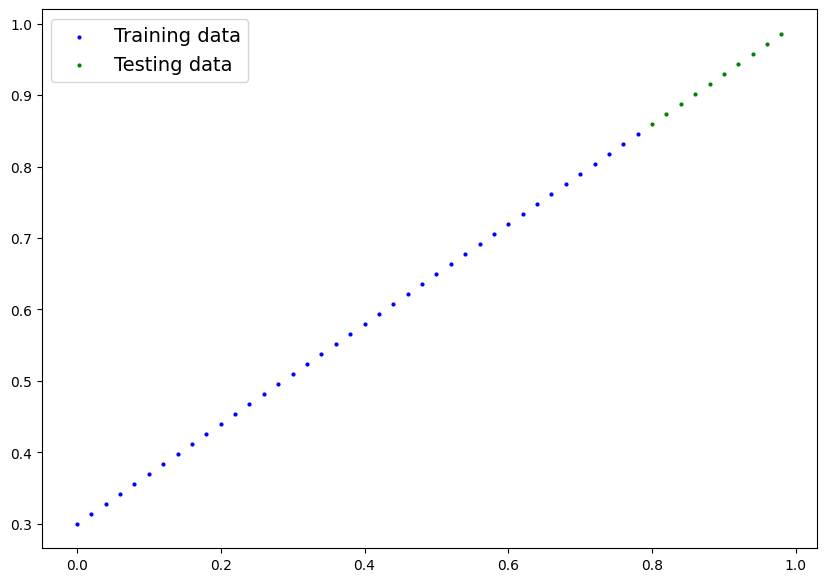

In [8]:
plot_prediction()

## 2. Build Model

Our first PyTorch model!

`torch.nn.Module` = base class for all nerual network modules. Make sure to override the foward() method

* https://pytorch.org/docs/stable/generated/torch.nn.Module.html
* https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html
* https://pytorch.org/docs/stable/autograd.html

***Forward method*** = Any subclass of nn.Module requires a `forward()`. It defines computation of model, defines the computation performed at every call.

What our Model does:
1. Start with random Values
2. Look at Training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so? PyTorch has implemented gradient descent and backprogagation for us. So we write higher level code to trigger these
* ***Gradient Descent*** = Why we have `requires_grad = true`. When we run computations, PyTorch will keep track of the gradients of the parameter(s) then it will update them through the combo of gradient descent and backprogatation. https://www.youtube.com/watch?v=IHZwWFHWa-w
* ***Backpropagation*** = https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [9]:
from torch import nn

# Create a linear regression model class
class LinearRegression(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()

        # Initalize model parameters:
        ## Start with random weights
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # this is the default
                                                dtype=torch.float)) # this is the default but good to be explicit
        ## Start with random bias
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

### Breakdown:

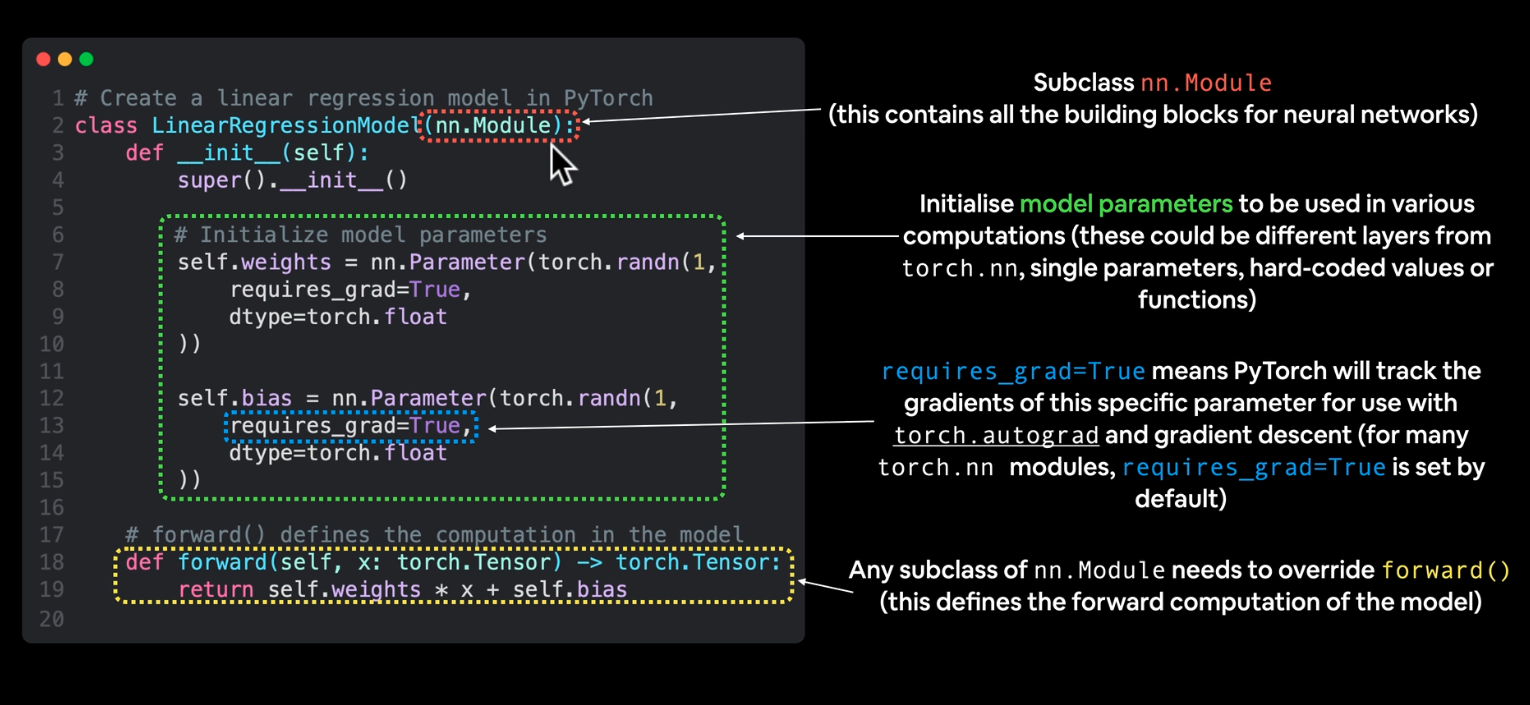

### PyTorch model building essentials

https://pytorch.org/tutorials/beginner/ptcheat.html

* `torch.nn` = contains all the building blocks for computational graphs ( a nerual network can be considered a computational graph)
* `torch.nn.Parameter` = what parameters should out model try and learn, often a PyTortch layer from torch.nn will set these for us
* `torch.nn.Module` = the base class for all neural network modules, if you subclass it, you should override forward()
* `torch.optim` = this where the optimizers in PyTorch live, they will help in gradient descent. 
* `def forward()` = All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

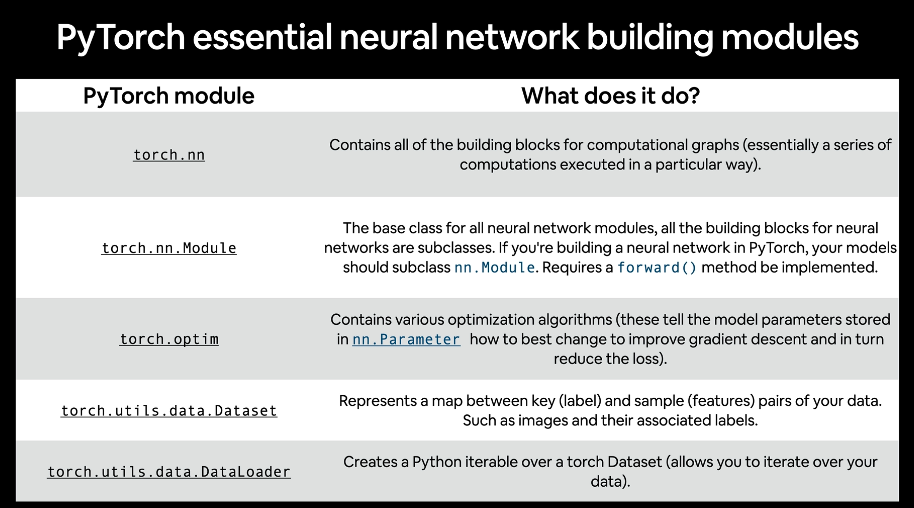







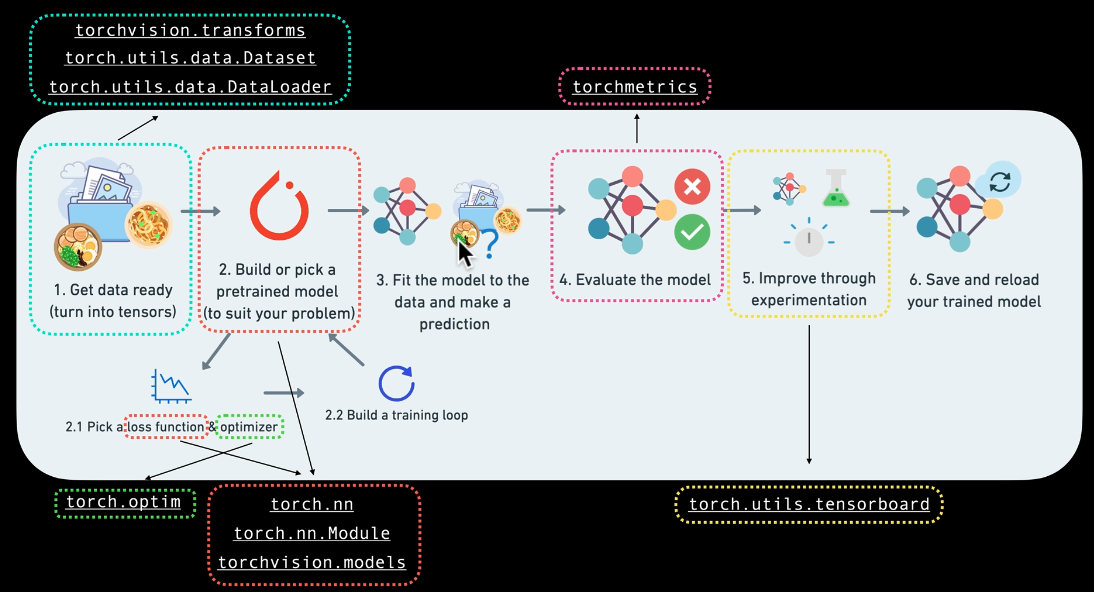

### Checking the contents of our PyTorch Model

Now we're created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`


In [10]:
# Create a ramdom seed
torch.manual_seed(42)

# Instantiate the model
model_0 = LinearRegression()

# Check the model's parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List name parameters
model_0.state_dict()
# NOTE: our goal is get these values ^ as close as possible as our ideal values

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
# Ideal values ( most cases we don't know these values)
weight, bias

(0.7, 0.3)

The goal of deep learning is to start with random values and get them closer and representive of ideal values

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how weel it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

`x` is commonly used as an input with models 

PyTorch uses inference as a word for predictions

`inference_mode()` is a context manager. It turns off the gradient tracking, thus PyTorch is keeping track of less data since that is not needed here, making it run faster. It is fairly new

* https://x.com/PyTorch/status/1437838231505096708 

`no_grad()` does the same as inference_mode() but inference_mode() is prefered

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [14]:
# Make predictions with models

# inferece_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

## no_grad()
# with torch.no_grad():
#    y_preds = model_0(X_test)

y_preds
# A perfect model: `X_test = y_test`

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

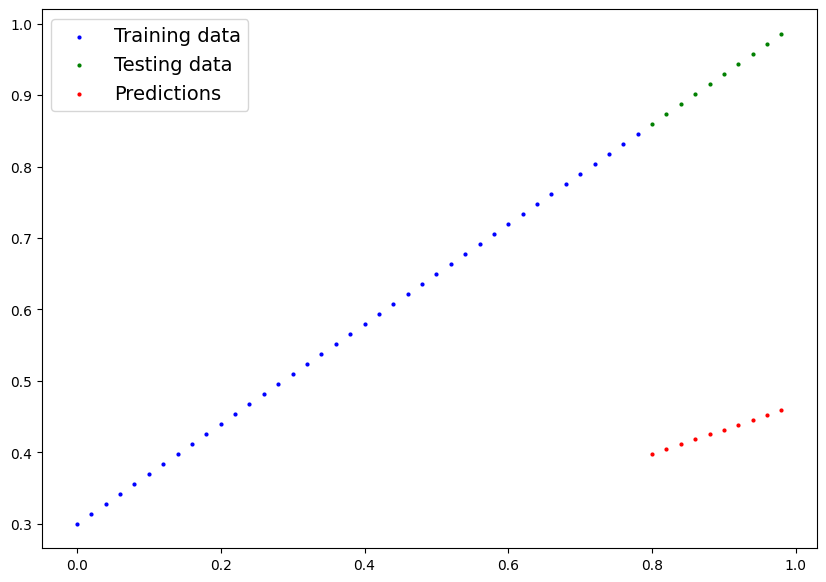

In [17]:
# Initial predictions are random, thus it will be quite bad
plot_prediction(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a `loss function`

* Note: Loss function may also be called a `cost function` or `criterion` in different areas. For our case, we're going to refer to it as a loss function.

Things  we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

And specfically for PyTorch, we need:
* A training loop
* A testing loop

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])